# Tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras import initializers
from sklearn.preprocessing import StandardScaler

import numpy as np
from os.path import join
from sklearn.model_selection import train_test_split

2025-01-12 20:37:21.586515: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-12 20:37:21.738519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736710641.794140   22584 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736710641.809860   22584 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-12 20:37:21.939247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=168*120*3, kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0)))
model.add(Dense(10, activation='softmax', kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0)))
model.summary()


/home/atroncos/workspace/oa_venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-12 20:37:26.164924: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       967,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 967,866 (3.69 MB)

 Trainable params: 967,866 (3.69 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)


In [5]:
DATA_PATH = 'data'

with np.load(join(DATA_PATH, 'processed_data.npz')) as data:
    data_dict=dict(data.items())
X = data_dict['X']
y = data_dict['y']

In [15]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
print('The training dataset has {} entries, the test dataset {}.'.format(
    len(X_train), len(X_test)))

The training dataset has 11532 entries, the test dataset 3844.


In [1]:
# Rescale train and validation data
scaler = StandardScaler()
X_train_preprocessed = scaler.fit_transform(X_train.reshape([-1, 168*120*3]).astype(float))
X_test_preprocessed = scaler.transform(X_test.reshape([-1, 168*120*3]).astype(float))

y_train_preprocessed = np.unique(y_train, return_inverse=True)[1]
y_test_preprocessed = np.unique(y_test, return_inverse=True)[1]

print('Train:', X_train_preprocessed.shape)
print('Test:', X_test_preprocessed.shape)

NameError: name 'StandardScaler' is not defined

In [7]:
%%time
# Fit model
history = model.fit(
    x=X_train_preprocessed, y=y_train_preprocessed,
    validation_split=0.2, batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)


Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.1556 - loss: 4.7215 - val_acc: 0.2007 - val_loss: 2.0794
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.2406 - loss: 1.9300 - val_acc: 0.1972 - val_loss: 2.0456
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.2787 - loss: 1.8154 - val_acc: 0.2046 - val_loss: 1.9796
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3138 - loss: 1.7636 - val_acc: 0.2111 - val_loss: 2.0536
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3212 - loss: 1.7375 - val_acc: 0.2107 - val_loss: 2.0096
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3386 - loss: 1.7028 - val_acc: 0.2046 - val_loss: 2.0953
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3504 - loss: 1.6688 - val_acc: 0.1621 - val_loss: 2.5496
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3755 - loss: 1.6495 - val_acc: 0.1695 - val_loss: 2.4615
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

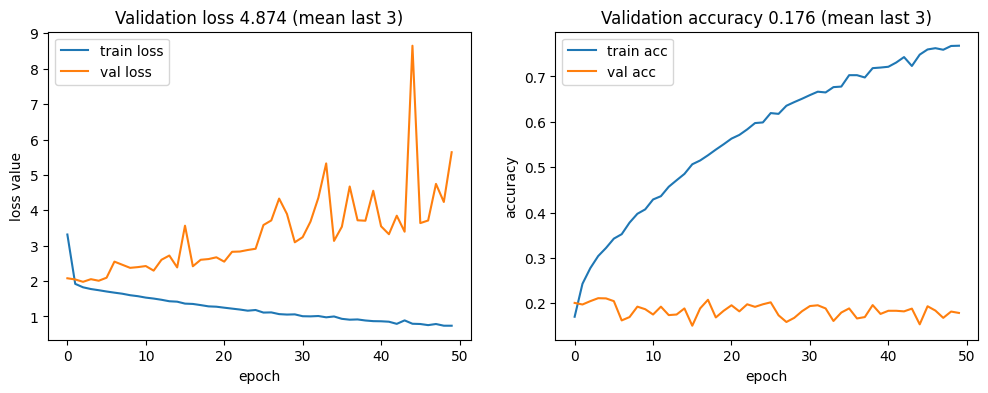

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()


In [9]:
(test_loss, test_accuracy) = model.evaluate(X_test_preprocessed, y_test_preprocessed, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss)) # around 0.19
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) # around 95%


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.1742 - loss: 5.5386 
Test loss: 5.40
Test accuracy: 17.69%


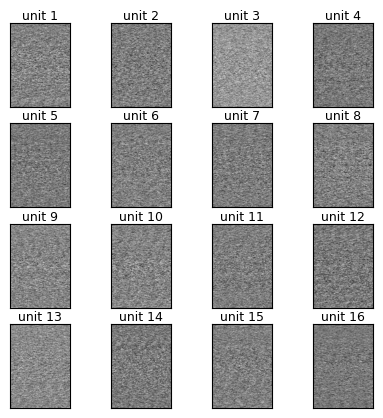

In [10]:
# Retrieve first hidden layer
hidden = model.layers[0]

# Get weights/biases
weights_hidden, biases_hidden = hidden.get_weights()

# Create figure with 16 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(5, 5))

# Plot the weights of the 16 hidden units
for i, axis in enumerate(axes.flatten()):
    # Get weights of i-th hidden unit
    weights = weights_hidden[:, i]

    # Reshape 
    weights = weights.reshape(168, 120)

    # Plot weights
    axis.set_title('unit {}'.format(i+1), size=9, pad=2)
    axis.imshow(weights, cmap=plt.cm.gray_r) # Grayscale
    axis.get_xaxis().set_visible(False) # Disable x-axis
    axis.get_yaxis().set_visible(False) # Disable y-axis

plt.show()
